In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('fangraphs-the-board-data.csv')
sign_mkt = pd.read_csv('sign_market.csv')
sign_mkt = sign_mkt[['Name', 'Sign Mkt', 'Ht', 'Wt', 'Signed From']]
df = pd.merge(df, sign_mkt, how='outer', on='Name')
df.head()

,Name,Pos,Org,Top 100,Org Rk,Age,Hit,Pitch Sel,Bat Ctrl,Game,Raw,Spd,Fld,Arm,Avg EV,Max EV,FV,playerId,Sign Mkt,Ht,Wt,Signed From
0,Wander Franco,SS,TBR,1.0,1.0,19.627778,60 / 80,60.0,70.0,45 / 60,55 / 60,60 / 60,50 / 55,60 / 60,89.0,108.0,80,sa3007033,J2,"5' 10""",190,Dominican Republic
1,Adley Rutschman,C,BAL,3.0,1.0,22.697222,45 / 60,60.0,45.0,40 / 55,60 / 60,40 / 35,60 / 70,60 / 60,91.0,107.0,60,sa3011643,Draft,"6' 2""",216,Oregon State
2,Julio Rodriguez,RF,SEA,4.0,1.0,19.800000,25 / 60,45.0,60.0,25 / 60,60 / 65,40 / 40,45 / 50,55 / 55,92.0,109.0,60,sa3005720,J2,"6' 3""",225,Dominican Republic
3,Joey Bart,C,SFG,5.0,1.0,23.838889,35 / 45,45.0,50.0,50 / 60,60 / 60,35 / 30,65 / 70,55 / 55,92.0,109.0,60,21524,Draft,"6' 3""",235,Georgia Tech
4,Jarred Kelenic,CF,SEA,6.0,2.0,21.252778,45 / 60,50.0,50.0,45 / 55,60 / 60,55 / 50,45 / 45,60 / 60,90.0,107.0,60,sa3007741,Draft,"6' 1""",196,Waukesha West HS (WI)


In [18]:
df[['game_power_current', 'game_power_future']] = df.Game.str.split(' / ', expand=True)
df[['raw_power_current', 'raw_power_future']] = df.Raw.str.split(' / ', expand=True)
df[['feet', 'inches']] = df.Ht.str.split(' ', expand=True)
df.replace('\'','', regex=True, inplace=True)
df.replace('\"','', regex=True, inplace=True)
df.feet = df.feet.astype(int)
df.inches = df.inches.astype(int)
df.Ht = (12 * df['feet']) + df['inches']
df = df.drop(['feet', 'inches'], axis=1)
df[['spd_current', 'spd_future']] = df.Spd.str.split(' / ', expand=True)
df[['fld_current', 'fld_future']] = df.Fld.str.split(' / ', expand=True)
df[['arm_current', 'arm_future']] = df.Arm.str.split(' / ', expand=True)
df[['hit_current', 'hit_future']] = df.Hit.str.split(' / ', expand=True)

mkt = {'Draft' : 0,
       'UDFA' : 0,
       'J2' : 1,
       'J2\n' : 1}
df['Sign Mkt'] = [mkt[item] for item in df['Sign Mkt']]

df['Signed From'] = df['Signed From'].astype(str)
df['HS'] = df['Signed From'].str.contains('HS').astype(int)
    
df.rename(columns = {'Sign Mkt' : 'INTL'})
df = df.drop('Signed From', axis=1)
df.head()

,Name,Pos,Org,Top 100,Org Rk,Age,Hit,Pitch Sel,Bat Ctrl,Game,Raw,Spd,Fld,Arm,Avg EV,Max EV,FV,playerId,Sign Mkt,Ht,Wt,game_power_current,game_power_future,raw_power_current,raw_power_future,spd_current,spd_future,fld_current,fld_future,arm_current,arm_future,hit_current,hit_future,HS
0,Wander Franco,SS,TBR,1.0,1.0,19.627778,60 / 80,60.0,70.0,45 / 60,55 / 60,60 / 60,50 / 55,60 / 60,89.0,108.0,80,sa3007033,1,70,190,45,60,55,60,60,60,50,55,60,60,60,80,0
1,Adley Rutschman,C,BAL,3.0,1.0,22.697222,45 / 60,60.0,45.0,40 / 55,60 / 60,40 / 35,60 / 70,60 / 60,91.0,107.0,60,sa3011643,0,74,216,40,55,60,60,40,35,60,70,60,60,45,60,0
2,Julio Rodriguez,RF,SEA,4.0,1.0,19.800000,25 / 60,45.0,60.0,25 / 60,60 / 65,40 / 40,45 / 50,55 / 55,92.0,109.0,60,sa3005720,1,75,225,25,60,60,65,40,40,45,50,55,55,25,60,0
3,Joey Bart,C,SFG,5.0,1.0,23.838889,35 / 45,45.0,50.0,50 / 60,60 / 60,35 / 30,65 / 70,55 / 55,92.0,109.0,60,21524,0,75,235,50,60,60,60,35,30,65,70,55,55,35,45,0
4,Jarred Kelenic,CF,SEA,6.0,2.0,21.252778,45 / 60,50.0,50.0,45 / 55,60 / 60,55 / 50,45 / 45,60 / 60,90.0,107.0,60,sa3007741,0,73,196,45,55,60,60,55,50,45,45,60,60,45,60,1


In [19]:
df = df.drop(['Game', 'Raw', 'Spd', 'Fld', 'Arm', 'Hit', 'Name', 'Top 100', 'Org Rk', 'playerId'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pos                 638 non-null    object 
 1   Org                 638 non-null    object 
 2   Age                 638 non-null    float64
 3   Pitch Sel           542 non-null    float64
 4   Bat Ctrl            550 non-null    float64
 5   Avg EV              555 non-null    float64
 6   Max EV              524 non-null    float64
 7   FV                  638 non-null    object 
 8   Sign Mkt            1277 non-null   int64  
 9   Ht                  1277 non-null   int32  
 10  Wt                  1277 non-null   int64  
 11  game_power_current  636 non-null    object 
 12  game_power_future   636 non-null    object 
 13  raw_power_current   637 non-null    object 
 14  raw_power_future    637 non-null    object 
 15  spd_current         637 non-null    object 
 16  spd_fu

In [20]:
df.Age = df.Age.round()

df['Max EV'] = df['Max EV'].fillna(df.groupby('Age')['Max EV'].transform('mean'))
df['Avg EV'] = df['Avg EV'].fillna(df.groupby('Age')['Avg EV'].transform('mean'))
df['Max EV'] = df['Max EV'].fillna(102)
df['Avg EV'] = df['Avg EV'].fillna(86)
df.info()
pd.options.display.max_columns = None
display(df[df.isna().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pos                 638 non-null    object 
 1   Org                 638 non-null    object 
 2   Age                 638 non-null    float64
 3   Pitch Sel           542 non-null    float64
 4   Bat Ctrl            550 non-null    float64
 5   Avg EV              1277 non-null   float64
 6   Max EV              1277 non-null   float64
 7   FV                  638 non-null    object 
 8   Sign Mkt            1277 non-null   int64  
 9   Ht                  1277 non-null   int32  
 10  Wt                  1277 non-null   int64  
 11  game_power_current  636 non-null    object 
 12  game_power_future   636 non-null    object 
 13  raw_power_current   637 non-null    object 
 14  raw_power_future    637 non-null    object 
 15  spd_current         637 non-null    object 
 16  spd_fu

,Pos,Org,Age,Pitch Sel,Bat Ctrl,Avg EV,Max EV,FV,Sign Mkt,Ht,Wt,game_power_current,game_power_future,raw_power_current,raw_power_future,spd_current,spd_future,fld_current,fld_future,arm_current,arm_future,hit_current,hit_future,HS
27,CF,NYY,18.0,NaN,NaN,86.866667,102.714286,50,1,71,194,25,60,60,65,70,70,45,55,60,60,20,55,0
47,CF,COL,19.0,NaN,NaN,91.000000,103.000000,50,0,76,190,25,60,55,65,60,55,40,50,50,50,25,55,1
48,3B,TOR,21.0,NaN,NaN,90.000000,107.000000,50,0,76,190,30,55,60,65,55,50,45,50,60,60,30,50,1
52,2B,PIT,21.0,NaN,NaN,87.304878,104.712500,50,0,70,190,35,50,55,55,40,40,40,45,45,45,35,60,0
81,CF,KCR,18.0,NaN,NaN,86.866667,102.714286,45+,1,75,180,25,55,45,55,55,50,40,50,55,55,25,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,NaN,NaN,NaN,NaN,NaN,86.000000,102.000000,NaN,1,76,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1273,NaN,NaN,NaN,NaN,NaN,86.000000,102.000000,NaN,1,72,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1274,NaN,NaN,NaN,NaN,NaN,86.000000,102.000000,NaN,0,75,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1275,NaN,NaN,NaN,NaN,NaN,86.000000,102.000000,NaN,0,77,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
bat_ctrl_corr = df.corr()['Bat Ctrl']
pitch_sel_corr = df.corr()['Pitch Sel']
display(bat_ctrl_corr, pitch_sel_corr)

Age         -0.019170
Pitch Sel    0.006970
Bat Ctrl     1.000000
Avg EV      -0.167370
Max EV      -0.236275
Sign Mkt     0.148629
Ht          -0.312766
Wt          -0.191853
HS          -0.122658
Name: Bat Ctrl, dtype: float64

Age          0.154317
Pitch Sel    1.000000
Bat Ctrl     0.006970
Avg EV       0.124410
Max EV       0.028948
Sign Mkt    -0.287988
Ht          -0.009986
Wt           0.162147
HS           0.005983
Name: Pitch Sel, dtype: float64

In [22]:
hf_bc = df.groupby('hit_future')['Bat Ctrl'].agg('mean')
hf_bc
df['Bat Ctrl'] = df['Bat Ctrl'].fillna(df.groupby('hit_future')['Bat Ctrl'].transform('mean'))
df['Pitch Sel'] = df['Pitch Sel'].fillna(df['Pitch Sel'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pos                 638 non-null    object 
 1   Org                 638 non-null    object 
 2   Age                 638 non-null    float64
 3   Pitch Sel           1277 non-null   float64
 4   Bat Ctrl            638 non-null    float64
 5   Avg EV              1277 non-null   float64
 6   Max EV              1277 non-null   float64
 7   FV                  638 non-null    object 
 8   Sign Mkt            1277 non-null   int64  
 9   Ht                  1277 non-null   int32  
 10  Wt                  1277 non-null   int64  
 11  game_power_current  636 non-null    object 
 12  game_power_future   636 non-null    object 
 13  raw_power_current   637 non-null    object 
 14  raw_power_future    637 non-null    object 
 15  spd_current         637 non-null    object 
 16  spd_fu

In [23]:
df[df['game_power_current'].isna()]
df = df.dropna(subset=['hit_current', 'fld_current', 'game_power_current', 'raw_power_current', 'spd_current'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 637
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pos                 636 non-null    object 
 1   Org                 636 non-null    object 
 2   Age                 636 non-null    float64
 3   Pitch Sel           636 non-null    float64
 4   Bat Ctrl            636 non-null    float64
 5   Avg EV              636 non-null    float64
 6   Max EV              636 non-null    float64
 7   FV                  636 non-null    object 
 8   Sign Mkt            636 non-null    int64  
 9   Ht                  636 non-null    int32  
 10  Wt                  636 non-null    int64  
 11  game_power_current  636 non-null    object 
 12  game_power_future   636 non-null    object 
 13  raw_power_current   636 non-null    object 
 14  raw_power_future    636 non-null    object 
 15  spd_current         636 non-null    object 
 16  spd_futu

In [24]:
ints = ['game_power_current', 'game_power_future', 'raw_power_current', 'raw_power_future', 'spd_current', 'spd_future', 'fld_current', 'fld_future', 'arm_current', 'arm_future', 'hit_current', 'hit_future', 'Bat Ctrl', 'Pitch Sel']
for i in ints:
    df[i] = df[i].astype(int)
df

,Pos,Org,Age,Pitch Sel,Bat Ctrl,Avg EV,Max EV,FV,Sign Mkt,Ht,Wt,game_power_current,game_power_future,raw_power_current,raw_power_future,spd_current,spd_future,fld_current,fld_future,arm_current,arm_future,hit_current,hit_future,HS
0,SS,TBR,20.0,60,70,89.000000,108.000000,80,1,70,190,45,60,55,60,60,60,50,55,60,60,60,80,0
1,C,BAL,23.0,60,45,91.000000,107.000000,60,0,74,216,40,55,60,60,40,35,60,70,60,60,45,60,0
2,RF,SEA,20.0,45,60,92.000000,109.000000,60,1,75,225,25,60,60,65,40,40,45,50,55,55,25,60,0
3,C,SFG,24.0,45,50,92.000000,109.000000,60,0,75,235,50,60,60,60,35,30,65,70,55,55,35,45,0
4,CF,SEA,21.0,50,50,90.000000,107.000000,60,0,73,196,45,55,60,60,55,50,45,45,60,60,45,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,CF,PIT,26.0,45,40,89.000000,107.000000,35+,0,73,215,40,40,60,60,70,70,50,55,40,40,35,35,1
634,CF,BOS,18.0,47,49,86.866667,102.714286,35+,1,74,170,20,50,40,50,60,55,45,55,50,55,20,50,0
635,C,DET,22.0,60,45,85.000000,102.000000,35+,0,73,195,30,35,40,45,40,35,45,50,55,55,30,40,1
636,C,BOS,18.0,45,45,88.000000,100.000000,35+,1,72,175,20,40,45,50,20,20,45,55,60,60,20,45,0


In [34]:
df_teams = df.groupby('Org').agg('mean')
df_teams['%INTL'] = (df.groupby('Org')[['Sign Mkt']].agg('mean') * 100)
df_teams['%HS'] = (df.groupby('Org')[['HS']].agg('mean') * 100)
df_teams['%Draft/UFDA'] = 100 - df_teams['%INTL']
df_teams = df_teams.astype(float).round(1)
df_teams['Count'] = df.groupby('Org').size()
# display(df_teams)
df_teams_intl = df.loc[df['Sign Mkt'] == 1].groupby(['Org']).agg('mean')
display(df_teams_intl)

,Age,Pitch Sel,Bat Ctrl,Avg EV,Max EV,Sign Mkt,Ht,Wt,game_power_current,game_power_future,raw_power_current,raw_power_future,spd_current,spd_future,fld_current,fld_future,arm_current,arm_future,hit_current,hit_future,HS
Org,,,,,,,,,,,,,,,,,,,,,
ARI,20.555556,47.222222,45.555556,87.000000,103.555556,1.0,72.777778,176.000000,30.000000,47.777778,45.555556,52.777778,55.000000,53.888889,43.333333,53.888889,55.000000,55.000000,27.222222,49.444444,0.0
ATL,22.500000,42.500000,45.000000,88.500000,105.500000,1.0,73.000000,182.500000,32.500000,47.500000,50.000000,55.000000,55.000000,52.500000,57.500000,67.500000,65.000000,65.000000,35.000000,47.500000,0.0
BAL,25.000000,50.000000,55.000000,89.500000,108.000000,1.0,71.500000,180.000000,40.000000,45.000000,47.500000,47.500000,45.000000,45.000000,45.000000,47.500000,47.500000,47.500000,50.000000,55.000000,0.0
BOS,19.300000,50.700000,48.900000,86.586667,101.471429,1.0,72.400000,180.100000,22.000000,42.500000,45.500000,53.000000,49.000000,47.000000,44.000000,54.000000,55.000000,56.000000,26.500000,51.000000,0.0
CHC,19.700000,44.400000,50.800000,85.373333,102.942857,1.0,71.800000,167.300000,24.000000,45.500000,44.500000,50.000000,47.500000,46.000000,43.500000,53.500000,54.000000,56.000000,25.000000,50.000000,0.0
CHW,21.555556,40.111111,51.444444,88.222222,105.444444,1.0,73.444444,202.222222,30.555556,47.777778,47.222222,53.888889,47.222222,43.888889,39.444444,45.555556,50.555556,51.666667,30.555556,50.555556,0.0
CIN,21.666667,36.166667,41.666667,88.550813,107.452083,1.0,74.333333,186.500000,29.166667,52.500000,56.666667,63.333333,48.333333,45.000000,44.166667,50.000000,60.833333,60.833333,26.666667,40.000000,0.0
CLE,19.769231,43.846154,50.384615,85.846154,103.615385,1.0,71.538462,175.846154,23.461538,48.461538,46.153846,53.076923,50.384615,46.923077,41.923077,51.538462,54.615385,55.384615,25.000000,50.000000,0.0
COL,20.000000,43.000000,47.000000,83.773333,101.342857,1.0,71.400000,163.800000,20.000000,38.000000,36.000000,45.000000,55.000000,54.000000,46.000000,56.000000,54.000000,57.000000,24.000000,50.000000,0.0


In [26]:
df.corr()

,Age,Pitch Sel,Bat Ctrl,Avg EV,Max EV,Sign Mkt,Ht,Wt,game_power_current,game_power_future,raw_power_current,raw_power_future,spd_current,spd_future,fld_current,fld_future,arm_current,arm_future,hit_current,hit_future,HS
Age,1.000000,0.146875,-0.052876,0.313736,0.353569,-0.411972,0.042980,0.336012,0.699370,-0.128337,0.303513,-0.047085,-0.086716,-0.014706,0.298454,-0.104258,-0.017336,-0.092154,0.739310,-0.198773,-0.132836
Pitch Sel,0.146875,1.000000,0.005762,0.120599,0.032409,-0.264764,-0.010431,0.151616,0.190409,0.013963,0.032876,-0.078231,-0.090729,-0.075101,0.017867,-0.040539,-0.142058,-0.147339,0.175828,0.152794,0.002591
Bat Ctrl,-0.052876,0.005762,1.000000,-0.159331,-0.241477,0.157457,-0.308037,-0.194662,-0.149632,-0.346880,-0.368527,-0.410985,-0.038517,-0.014250,0.074370,0.045789,-0.190331,-0.198524,0.347752,0.789313,-0.123893
Avg EV,0.313736,0.120599,-0.159331,1.000000,0.702028,-0.180955,0.280954,0.451788,0.493848,0.435476,0.564130,0.469805,-0.267473,-0.269652,-0.057988,-0.230046,0.023143,-0.003769,0.201407,-0.193171,0.004614
Max EV,0.353569,0.032409,-0.241477,0.702028,1.000000,-0.188478,0.350222,0.505048,0.557382,0.507458,0.666921,0.563636,-0.225466,-0.240084,-0.027290,-0.225084,0.097861,0.061096,0.211161,-0.306501,0.049565
Sign Mkt,-0.411972,-0.264764,0.157457,-0.180955,-0.188478,1.000000,-0.186179,-0.359566,-0.349835,-0.036154,-0.271193,-0.073752,0.005389,-0.023672,-0.045315,0.070978,0.105376,0.153554,-0.229670,0.202474,-0.511714
Ht,0.042980,-0.010431,-0.308037,0.280954,0.350222,-0.186179,1.000000,0.510182,0.217334,0.465322,0.470427,0.556653,-0.172165,-0.220312,-0.085658,-0.128378,0.131253,0.153558,-0.109192,-0.330545,0.120553
Wt,0.336012,0.151616,-0.194662,0.451788,0.505048,-0.359566,0.510182,1.000000,0.479292,0.426535,0.666991,0.534810,-0.449815,-0.459713,-0.066724,-0.237344,0.001147,-0.054108,0.174663,-0.265668,0.102625
game_power_current,0.699370,0.190409,-0.149632,0.493848,0.557382,-0.349835,0.217334,0.479292,1.000000,0.331065,0.533603,0.301647,-0.204731,-0.166470,0.112170,-0.217212,-0.020153,-0.083337,0.563567,-0.255213,-0.001037
game_power_future,-0.128337,0.013963,-0.346880,0.435476,0.507458,-0.036154,0.465322,0.426535,0.331065,1.000000,0.688236,0.822762,-0.258320,-0.339340,-0.324846,-0.326852,0.040421,0.053377,-0.268017,-0.324274,0.071032


<AxesSubplot:ylabel='Org'>

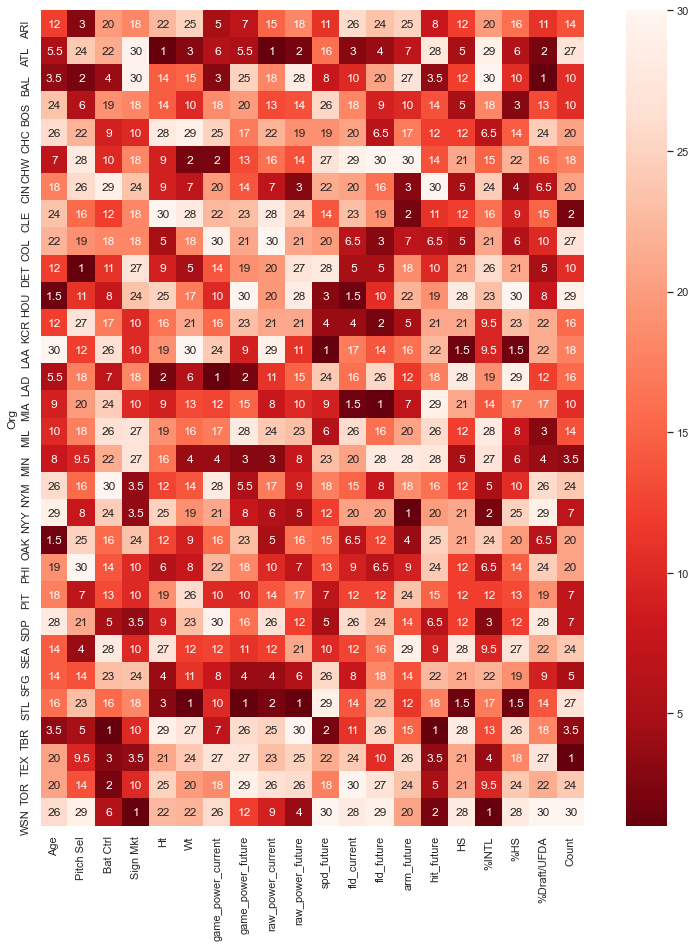

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
df_team_ranks = df_teams.rank(ascending=False)
ax = sns.heatmap(df_team_ranks.drop(['Max EV', 'Avg EV', 'spd_current', 'arm_current', 'hit_current'], axis=1),
                 annot=True,
                 square=True,
                 cmap='Reds_r')
ax

to-do:
-break into groups: DRAFT (HS/COLLEGE), J2
-look at pitchers
-

<AxesSubplot:ylabel='Org'>

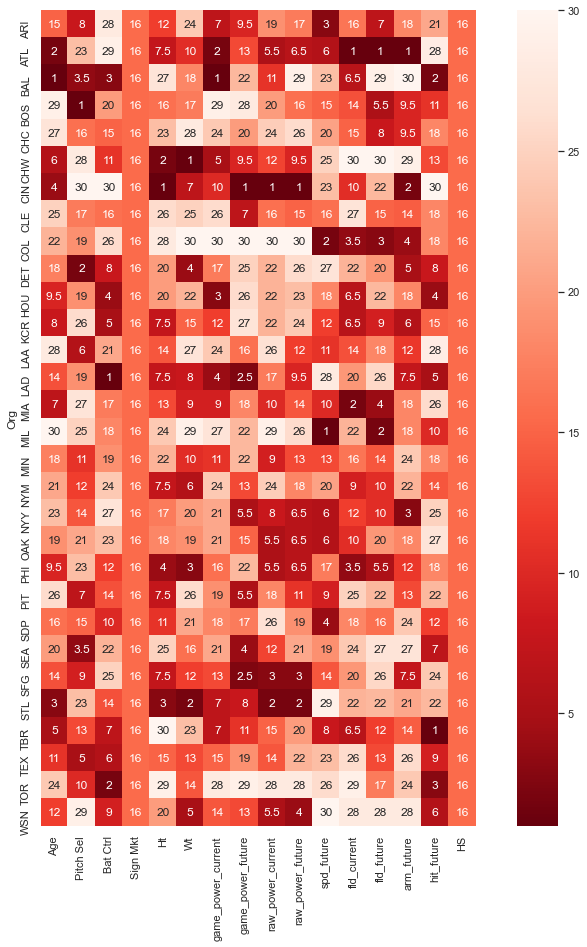

In [35]:
df_team_intl_ranks = df_teams_intl.rank(ascending=False)
ax = sns.heatmap(df_team_intl_ranks.drop(['Max EV', 'Avg EV', 'spd_current', 'arm_current', 'hit_current'], axis=1),
                 annot=True,
                 square=True,
                 cmap='Reds_r')
ax